# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [97]:
#Import your libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import hdbscan
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [4]:
#Load the dataset and explore its variables
data = pd.read_csv('snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [30]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [6]:
#Your code here: el objetivo del ejercicio es identificar grupos de adolescentes, por lo que se hará un filtro en la variable edad dejando sólo a los adolescentes.
data2=data[(data.age>=13) & (data.age<=19)]

In [10]:
# La variable "gender" es del tipo objeto, por lo que se le asignará el valor "1" cuando sea mujero y "0" cuando sea hombre
data2['gender'] = data2['gender'].replace(['F'],1)
data2['gender'] = data2['gender'].replace(['M'],0)
data2['gender'].value_counts()

<ipython-input-10-d4df1c205641>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['gender'] = data2['gender'].replace(['F'],1)
<ipython-input-10-d4df1c205641>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['gender'] = data2['gender'].replace(['M'],0)


1.0    17996
0.0     4177
Name: gender, dtype: int64

In [11]:
#Se eliminarán variables nulos
data2.dropna(inplace=True)

<ipython-input-11-d24fa5a89eda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace=True)


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22173 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      22173 non-null  int64  
 1   gender        22173 non-null  float64
 2   age           22173 non-null  float64
 3   friends       22173 non-null  int64  
 4   basketball    22173 non-null  int64  
 5   football      22173 non-null  int64  
 6   soccer        22173 non-null  int64  
 7   softball      22173 non-null  int64  
 8   volleyball    22173 non-null  int64  
 9   swimming      22173 non-null  int64  
 10  cheerleading  22173 non-null  int64  
 11  baseball      22173 non-null  int64  
 12  tennis        22173 non-null  int64  
 13  sports        22173 non-null  int64  
 14  cute          22173 non-null  int64  
 15  sex           22173 non-null  int64  
 16  sexy          22173 non-null  int64  
 17  hot           22173 non-null  int64  
 18  kissed        22173 non-nu

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

(array([4618.,    0.,    0., 5943.,    0.,    0., 5862.,    0.,    0.,
        5750.]),
 array([2006. , 2006.3, 2006.6, 2006.9, 2007.2, 2007.5, 2007.8, 2008.1,
        2008.4, 2008.7, 2009. ]),
 <a list of 10 Patch objects>)

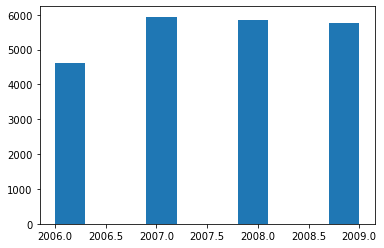

In [23]:
#Your code here:
plt.hist(data2['gradyear'])

(array([ 4177.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17996.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

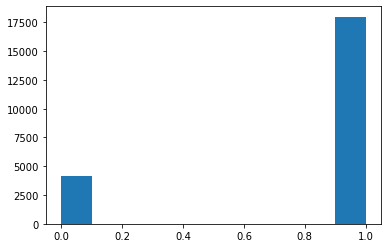

In [24]:
plt.hist(data2['gender'])

(array([   8.,   15.,   37., 1052., 3095., 3627., 3548., 3788., 3756.,
        3247.]),
 array([13.027 , 13.6241, 14.2212, 14.8183, 15.4154, 16.0125, 16.6096,
        17.2067, 17.8038, 18.4009, 18.998 ]),
 <a list of 10 Patch objects>)

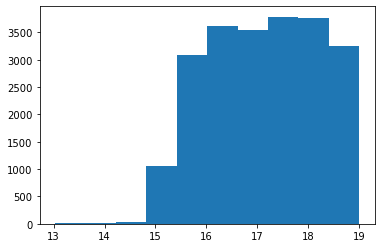

In [25]:
plt.hist(data2['age'])

(array([2.0468e+04, 1.4910e+03, 1.6800e+02, 3.7000e+01, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,  83., 166., 249., 332., 415., 498., 581., 664., 747., 830.]),
 <a list of 10 Patch objects>)

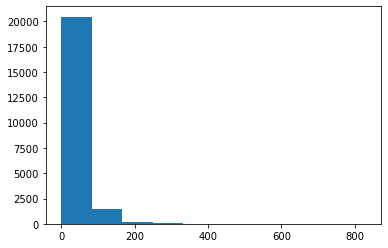

In [26]:
plt.hist(data2['friends'])

(array([2.1614e+04, 4.2500e+02, 1.0900e+02, 1.4000e+01, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

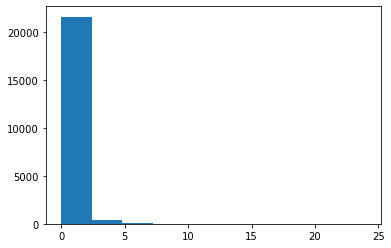

In [27]:
plt.hist(data2['basketball'])

(array([2.0965e+04, 7.4300e+02, 3.7500e+02, 4.2000e+01, 4.0000e+01,
        6.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

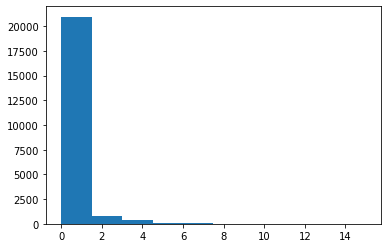

In [28]:
plt.hist(data2['football'])

(array([2.1568e+04, 4.5200e+02, 1.1800e+02, 1.5000e+01, 1.3000e+01,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

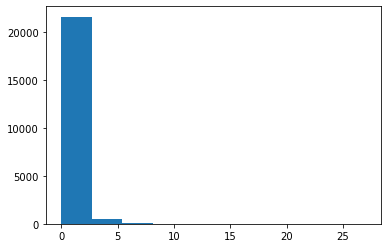

In [31]:
plt.hist(data2['soccer'])

(array([2.1352e+04, 5.6200e+02, 1.5500e+02, 4.1000e+01, 4.2000e+01,
        1.4000e+01, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

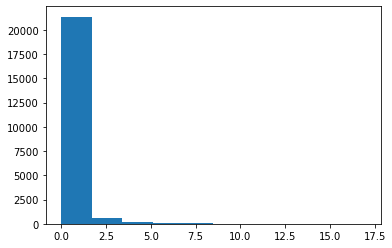

In [32]:
plt.hist(data2['softball'])

(array([2.1496e+04, 3.4700e+02, 2.0600e+02, 4.7000e+01, 3.6000e+01,
        2.6000e+01, 6.0000e+00, 7.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

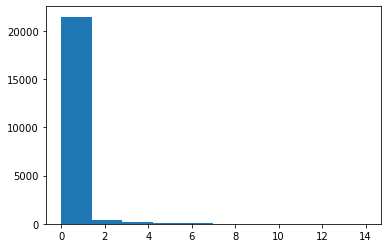

In [33]:
plt.hist(data2['volleyball'])

(array([2.2105e+04, 6.0000e+01, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

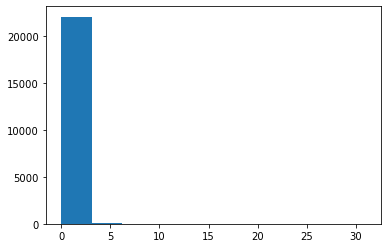

In [34]:
plt.hist(data2['swimming'])

(array([2.0753e+04, 8.4000e+02, 3.1900e+02, 1.3200e+02, 6.5000e+01,
        3.1000e+01, 2.3000e+01, 4.0000e+00, 4.0000e+00, 2.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

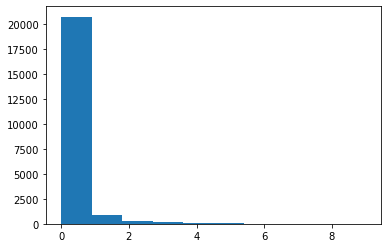

In [35]:
plt.hist(data2['cheerleading'])

(array([2.1699e+04, 3.5400e+02, 4.7000e+01, 5.3000e+01, 1.0000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

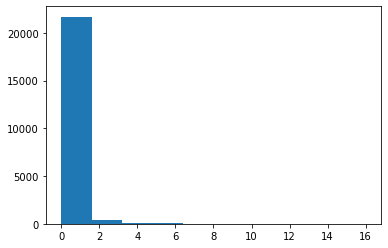

In [36]:
plt.hist(data2['baseball'])

(array([2.1807e+04, 1.7800e+02, 8.4000e+01, 6.0000e+01, 1.6000e+01,
        1.4000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

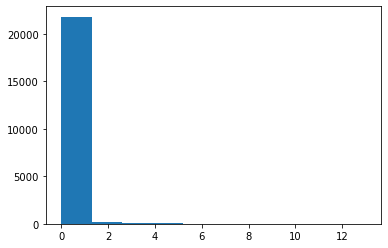

In [37]:
plt.hist(data2['tennis'])

(array([2.1707e+04, 3.3500e+02, 7.8000e+01, 2.8000e+01, 1.3000e+01,
        9.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

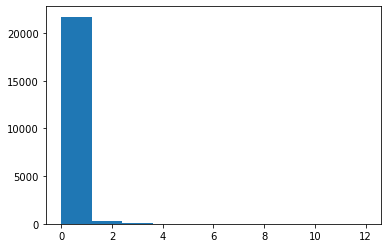

In [38]:
plt.hist(data2['sports'])

(array([2.0562e+04, 1.0090e+03, 4.8900e+02, 5.7000e+01, 4.1000e+01,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

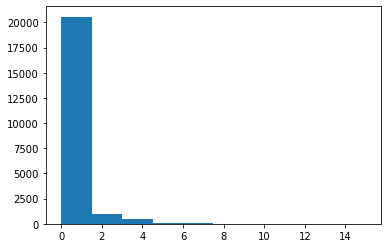

In [39]:
plt.hist(data2['cute'])

(array([2.2155e+04, 1.3000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  11.4,  22.8,  34.2,  45.6,  57. ,  68.4,  79.8,  91.2,
        102.6, 114. ]),
 <a list of 10 Patch objects>)

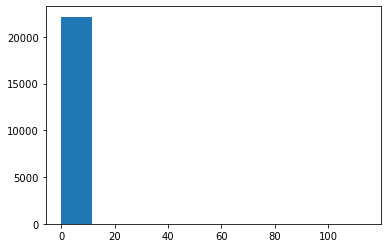

In [40]:
plt.hist(data2['sex'])

(array([2.1663e+04, 4.0300e+02, 7.8000e+01, 2.3000e+01, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

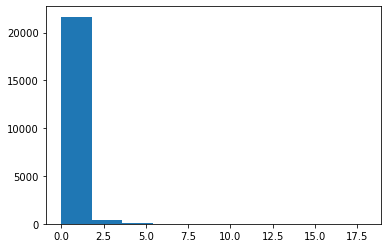

In [41]:
plt.hist(data2['sexy'])

(array([2.0064e+04, 1.5800e+03, 3.3900e+02, 1.1400e+02, 4.2000e+01,
        1.8000e+01, 1.2000e+01, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

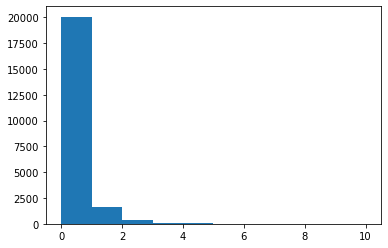

In [42]:
plt.hist(data2['hot'])

(array([2.1936e+04, 2.1600e+02, 1.6000e+01, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

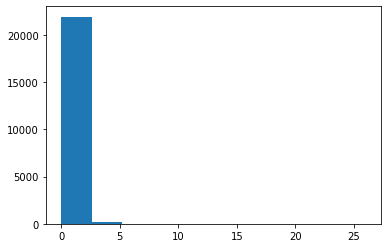

In [43]:
plt.hist(data2['kissed'])

(array([2.1159e+04, 8.0400e+02, 1.4300e+02, 3.9000e+01, 1.4000e+01,
        7.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

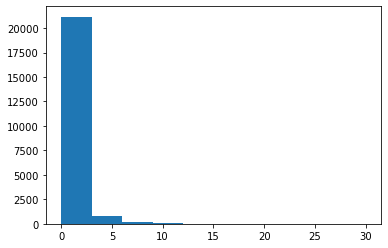

In [44]:
plt.hist(data2['dance'])

(array([2.1421e+04, 5.6300e+02, 1.2900e+02, 2.7000e+01, 2.1000e+01,
        5.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

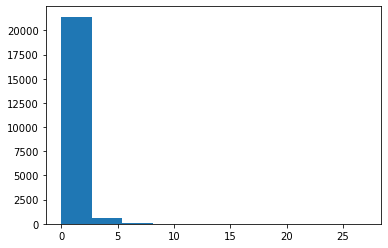

In [45]:
plt.hist(data2['band'])

(array([2.1989e+04, 1.3100e+02, 2.9000e+01, 1.3000e+01, 4.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

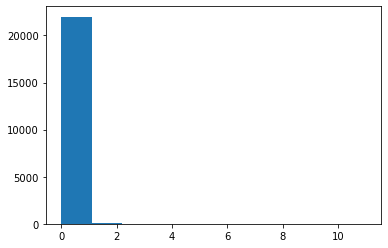

In [46]:
plt.hist(data2['marching'])

(array([2.0701e+04, 1.2950e+03, 1.3800e+02, 1.5000e+01, 1.1000e+01,
        4.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

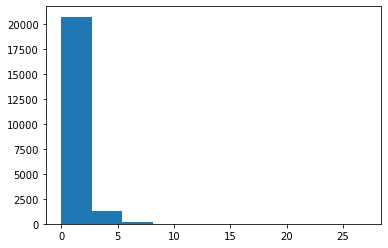

In [47]:
plt.hist(data2['music'])

(array([2.1791e+04, 2.7400e+02, 7.3000e+01, 1.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

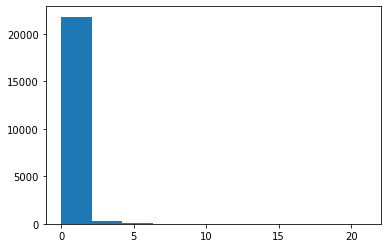

In [48]:
plt.hist(data2['rock'])

(array([2.1701e+04, 3.7900e+02, 5.7000e+01, 1.9000e+01, 8.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

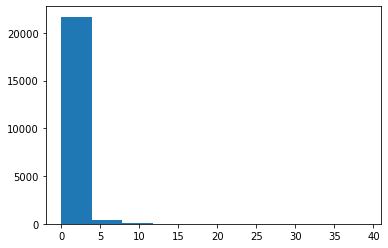

In [49]:
plt.hist(data2['god'])

(array([2.2016e+04, 1.3500e+02, 2.0000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <a list of 10 Patch objects>)

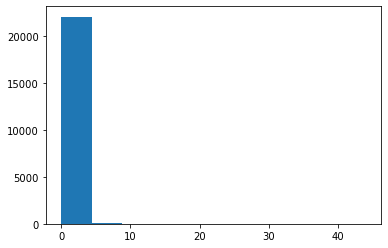

In [50]:
plt.hist(data2['church'])

(array([2.2024e+04, 1.2200e+02, 1.5000e+01, 6.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

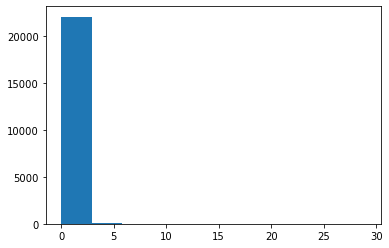

In [51]:
plt.hist(data2['jesus'])

(array([2.182e+04, 2.750e+02, 6.100e+01, 6.000e+00, 0.000e+00, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

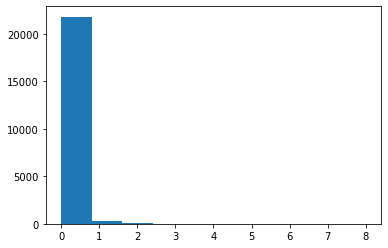

In [52]:
plt.hist(data2['bible'])

(array([2.1576e+04, 5.2800e+02, 6.0000e+01, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <a list of 10 Patch objects>)

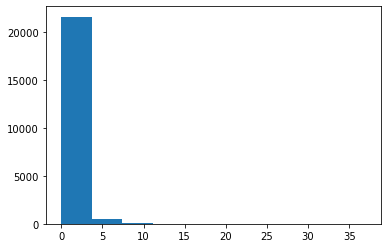

In [53]:
plt.hist(data2['hair'])

(array([2.0362e+04, 1.3310e+03, 3.3300e+02, 8.3000e+01, 3.9000e+01,
        1.6000e+01, 5.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

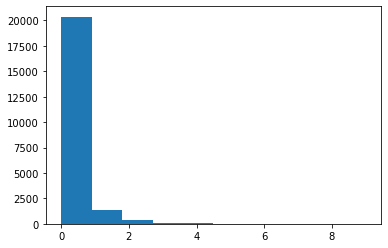

In [54]:
plt.hist(data2['dress'])

(array([2.2172e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  32.7,  65.4,  98.1, 130.8, 163.5, 196.2, 228.9, 261.6,
        294.3, 327. ]),
 <a list of 10 Patch objects>)

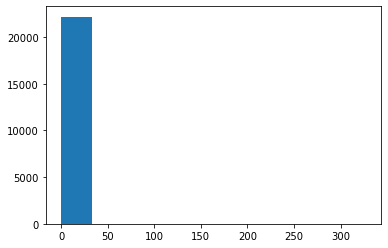

In [55]:
plt.hist(data2['blonde'])

(array([2.0992e+04, 7.5600e+02, 2.4100e+02, 9.4000e+01, 4.0000e+01,
        3.8000e+01, 3.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

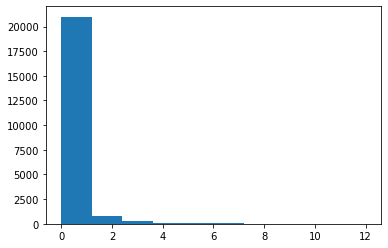

In [56]:
plt.hist(data2['mall'])

(array([2.0639e+04, 1.0520e+03, 3.0800e+02, 1.1900e+02, 3.5000e+01,
        9.0000e+00, 5.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

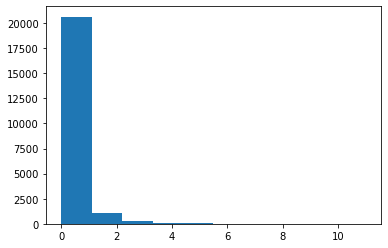

In [57]:
plt.hist(data2['shopping'])

(array([1.9521e+04, 2.0650e+03, 4.2900e+02, 1.1000e+02, 0.0000e+00,
        3.2000e+01, 9.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

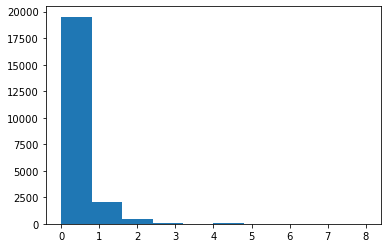

In [58]:
plt.hist(data2['clothes'])

(array([2.099e+04, 9.060e+02, 1.990e+02, 4.900e+01, 1.500e+01, 7.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

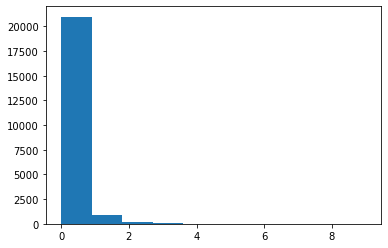

In [60]:
plt.hist(data2['hollister'])

(array([2.1198e+04, 7.9800e+02, 1.3800e+02, 2.6000e+01, 0.0000e+00,
        6.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

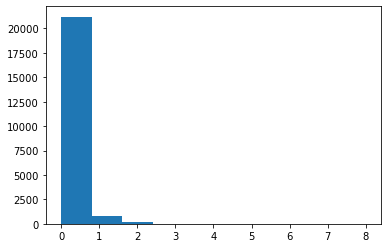

In [62]:
plt.hist(data2['abercrombie'])

(array([2.1926e+04, 1.9600e+02, 2.9000e+01, 1.2000e+01, 5.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

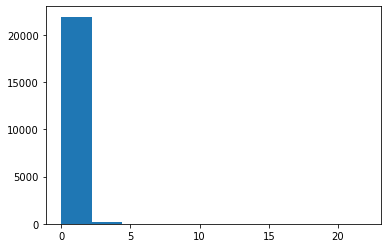

In [63]:
plt.hist(data2['die'])

(array([2.1783e+04, 2.8300e+02, 8.8000e+01, 1.1000e+01, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

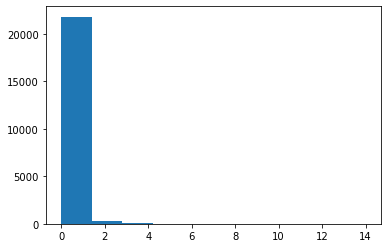

In [64]:
plt.hist(data2['death'])

(array([2.0699e+04, 1.1160e+03, 2.5300e+02, 6.1000e+01, 0.0000e+00,
        2.5000e+01, 5.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

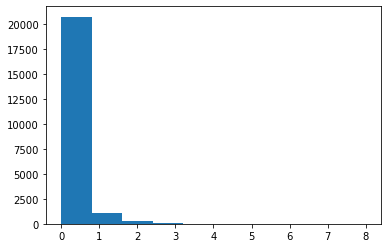

In [65]:
plt.hist(data2['drunk'])

(array([2.1896e+04, 2.4200e+02, 2.4000e+01, 6.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

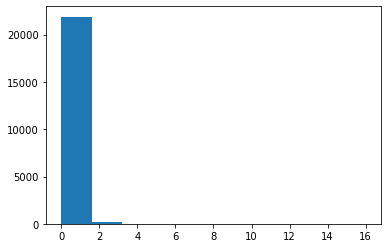

In [66]:
plt.hist(data2['drugs'])

In [67]:
correlation = data2.corr()
correlation

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,1.000000,0.041496,-0.910088,0.058011,0.063641,0.029645,0.051393,0.038426,0.053952,0.029819,...,0.007808,0.068574,0.029032,0.031810,0.049617,0.045473,0.013249,-0.007145,-0.022319,0.004818
gender,0.041496,1.000000,-0.069838,0.078400,-0.023640,-0.126483,0.012243,0.103853,0.083662,0.055941,...,0.018636,0.086076,0.207589,0.079319,0.052021,0.050874,0.008119,0.019984,0.024268,0.008486
age,-0.910088,-0.069838,1.000000,-0.050011,-0.054434,-0.011910,-0.049956,-0.035758,-0.049965,-0.027451,...,-0.004549,-0.065317,-0.032190,-0.032041,-0.045114,-0.048271,-0.014689,0.008036,0.024888,-0.006992
friends,0.058011,0.078400,-0.050011,1.000000,0.048251,0.028075,0.028776,0.051424,0.043685,0.027832,...,0.008374,0.063668,0.083926,0.022551,0.052774,0.054988,0.015728,0.029665,0.014913,-0.009763
basketball,0.063641,-0.023640,-0.054434,0.048251,1.000000,0.172545,0.073864,0.121003,0.131242,0.020977,...,0.013545,0.065019,0.066248,0.068698,0.036340,0.035061,0.021516,0.020226,0.020798,0.031058
football,0.029645,-0.126483,-0.011910,0.028075,0.172545,1.000000,0.058196,0.046935,0.055078,0.031203,...,0.032013,0.065801,0.053403,0.068198,0.069283,0.044471,0.026024,0.019314,0.038542,0.032462
soccer,0.051393,0.012243,-0.049956,0.028776,0.073864,0.058196,1.000000,0.013451,0.025337,0.039603,...,0.010929,0.020199,0.057073,0.024626,0.031864,0.026811,0.011530,0.005377,0.009939,0.018590
softball,0.038426,0.103853,-0.035758,0.051424,0.121003,0.046935,0.013451,1.000000,0.119973,0.019729,...,0.005455,0.032543,0.044110,0.050917,0.022622,0.015980,0.014018,0.018205,0.006917,0.013148
volleyball,0.053952,0.083662,-0.049965,0.043685,0.131242,0.055078,0.025337,0.119973,1.000000,0.043405,...,0.005923,0.031123,0.074221,0.028259,0.041294,0.048739,0.002492,0.015155,0.003089,0.011868
swimming,0.029819,0.055941,-0.027451,0.027832,0.020977,0.031203,0.039603,0.019729,0.043405,1.000000,...,0.020629,0.041675,0.111870,0.063827,0.036398,0.055516,0.012012,0.016949,0.025299,0.030597


## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [69]:
#Your code here: Se quitarán outliers
columns=['friends','friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']
cuts=[data2[col].quantile(.99) for col in columns]
for i,col in enumerate(columns):
    data2=data2[data2[col]<cuts[i]]

In [71]:
#Se eleminará la variable "gradyear" porque tiene una correlación muy alta (-0.9) con age
data2.drop(['gradyear'],axis=1,inplace=True)

In [72]:
#se resetea el index
data2.reset_index(inplace=True,drop=True)

In [73]:
data2.head()

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.0,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,18.322,17,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,18.543,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Se va a estandarizar(escalar) los datos
scaler=MinMaxScaler()

In [77]:
data3=pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)

In [78]:
data3.head()

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.0,0.997282,0.042945,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.887360,0.423313,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.979103,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.885151,0.104294,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.922698,0.049080,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
cols=['gender', 'age', 'friends', 'basketball', 'football', 'soccer',
       'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball',
       'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance',
       'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible',
       'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs']

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [88]:
#Your code here:
kmeans = KMeans(n_clusters=4)
data_clusters = kmeans.fit(data3[cols])



In [89]:
len(data_clusters.cluster_centers_)

4

In [91]:
data_clusters.cluster_centers_

array([[ 1.00000000e+00,  6.85361257e-01,  1.70619129e-01,
         4.93350493e-02,  5.42149292e-02,  3.15583441e-02,
         3.18890319e-02,  3.66795367e-02,  1.31838984e-15,
         3.29794080e-02,  2.52037752e-02,  2.53110253e-02,
         9.15933995e-16,  8.44058344e-02,  3.05662806e-02,
         8.15100815e-02,  6.68168168e-02,  2.19862720e-02,
         7.40830116e-02,  3.31134706e-02,  0.00000000e+00,
         1.40792578e-01,  7.18039468e-02,  7.76758902e-02,
         4.92635493e-02,  4.64392964e-02,  0.00000000e+00,
         6.39210639e-02,  5.30888031e-02,  3.26040326e-02,
         8.45130845e-02,  1.36636637e-01,  7.09995710e-02,
         1.79107679e-02,  0.00000000e+00,  5.80223080e-02,
         6.45645646e-02,  3.92535393e-02,  2.41312741e-02],
       [ 6.99806950e-01,  6.76145674e-01,  1.69422271e-01,
         1.13899614e-01,  1.39961390e-01,  6.05694981e-02,
         6.17760618e-02,  5.50193050e-02,  1.25482625e-02,
         2.36486486e-02,  9.65250965e-02,  5.11583012e-

In [92]:
preds = data_clusters.fit_predict(data3[cols])

In [93]:
data3['cluster']=preds

In [94]:
data3.cluster.unique()

array([0, 2, 3, 1])

In [95]:
data3.cluster.value_counts()

2    9289
0    2340
1    1058
3     995
Name: cluster, dtype: int64

In [99]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data3[cols])

NearestNeighbors()

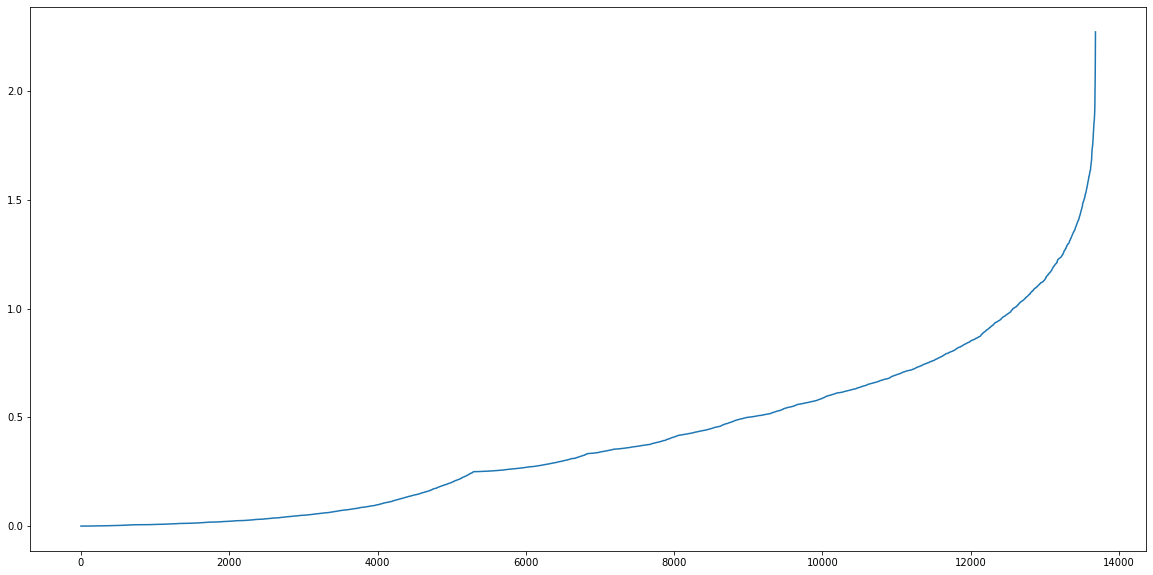

In [100]:
distances, indices = nearest_neighbors.kneighbors(data3[cols])
distances = np.sort(distances, axis=0)[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.show()

In [157]:
m = DBSCAN(eps=1.1, min_samples=4)
m.fit(data3[cols])

DBSCAN(eps=1.1, min_samples=4)

In [158]:
labels = m.labels_

In [159]:
labels_mask_general = np.zeros_like(labels,dtype=bool)

In [160]:
labels_mask_general[m.core_sample_indices_] = True

In [161]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
n_noise

883

In [162]:
n_clusters

3

In [163]:
#DBSCAN que encuentra el número óptimo de clusters indica que deberían ser 3 clusters.